# TAHLR Week 14: Frequency Analysis

Code notebook for TAHLR course at ISAW (Fall 2023) based on Sweigart 2018 (CCWP) Ch. 19: Frequency Analysis and Ch. 6: Hacking the Caesar Cipher with Brute-Force

In [22]:
# Imports

from collections import Counter
import re
import matplotlib.pyplot as plt
import urllib.request
from pprint import pprint

from detectEnglish import isEnglish

## Analyzing the Frequency of Letters in Text

In [2]:
# Helper function, preprocesses text

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z]', '', text)
    return text

In [4]:
# Get text of Moby-Dick

url = 'https://www.gutenberg.org/cache/epub/2701/pg2701.txt'
response = urllib.request.urlopen(url)
data = response.read().decode('utf-8')
text = preprocess(data.lower())
sample = [w.strip().lower() for w in text if w.strip()]
print(sample[993:1007])

['m', 'e', 'r', 'r', 'y', 'c', 'h', 'r', 'i', 's', 't', 'm', 'a', 's']


In [5]:
# Get counter

letter_frequency = Counter(sample)
pprint(letter_frequency)

Counter({'e': 119345,
         't': 89874,
         'a': 79220,
         'o': 70808,
         'n': 66778,
         'i': 66671,
         's': 65136,
         'h': 63769,
         'r': 53589,
         'l': 43349,
         'd': 38834,
         'u': 27205,
         'm': 23626,
         'c': 23318,
         'w': 22556,
         'g': 21287,
         'f': 21252,
         'p': 17873,
         'y': 17242,
         'b': 17203,
         'v': 8724,
         'k': 8228,
         'q': 1581,
         'j': 1176,
         'x': 1064,
         'z': 635})


In [6]:
# Get normed frequency

total_letters = sum(letter_frequency.values())
norm_letter_frequency = {k: round(v/total_letters, 5) for k, v in letter_frequency.items()}
sorted_norm_letter_frequency = dict(sorted(norm_letter_frequency.items(), key=lambda item: item[1], reverse=True))
sorted_norm_letter_frequency

{'e': 0.12299,
 't': 0.09262,
 'a': 0.08164,
 'o': 0.07297,
 'n': 0.06882,
 'i': 0.06871,
 's': 0.06713,
 'h': 0.06572,
 'r': 0.05523,
 'l': 0.04467,
 'd': 0.04002,
 'u': 0.02804,
 'm': 0.02435,
 'c': 0.02403,
 'w': 0.02325,
 'g': 0.02194,
 'f': 0.0219,
 'p': 0.01842,
 'y': 0.01777,
 'b': 0.01773,
 'v': 0.00899,
 'k': 0.00848,
 'q': 0.00163,
 'j': 0.00121,
 'x': 0.0011,
 'z': 0.00065}

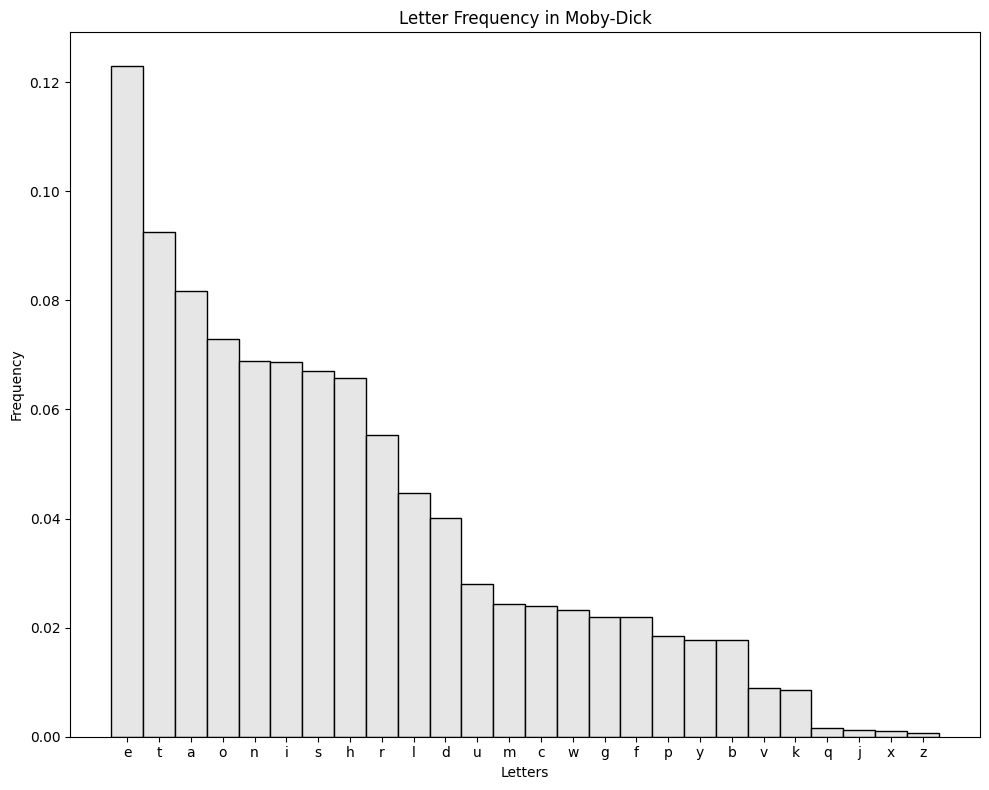

In [7]:
# Plotting

plt.figure(figsize=(10, 8))  # Set the figure size to be similar to the one in the image

plt.bar(sorted_norm_letter_frequency.keys(), sorted_norm_letter_frequency.values(), color=(0.9, 0.9, 0.9), 
    edgecolor='black', linewidth=1, width=1.0)
plt.xlabel('Letters')

plt.ylabel('Frequency')

plt.title('Letter Frequency in Moby-Dick')

plt.tight_layout()  # Adjust the layout to make sure everything fits without overlapping

plt.show()

In [8]:
# Sample text, encrypted

text1 = """Sy l nlx sr pyyacao l ylwj eiswi upar lulsxrj isr sxrjsxwjr, ia esmm
rwctjsxsza sj wmpramh, lxo txmarr jia aqsoaxwa sr pqaceiamnsxu, ia esmm caytra
jp famsaqa sj. Sy, px jia pjiac ilxo, ia sr pyyacao rpnajisxu eiswi lyypcor
l calrpx ypc lwjsxu sx lwwpcolxwa jp isr sxrjsxwjr, ia esmm lwwabj sj aqax
px jia rmsuijarj aqsoaxwa. Jia pcsusx py nhjir sr agbmlsxao sx jisr elh.
-Facjclxo Ctrramm"""

In [9]:
# Sample text, unencrypted

text2 = """Alan Mathison Turing was a British mathematician, logician, cryptanalyst, and computer
scientist. He was highly influential in the development of computer science, providing a
formalisation of the concepts of "algorithm" and "computation" with the Turing machine. Turing
is widely considered to be the father of computer science and artificial intelligence. During
World War II, Turing worked for the Government Code and Cypher School (GCCS) at Bletchley Park,
Britain's codebreaking centre. For a time he was head of Hut 8, the section responsible for
German naval cryptanalysis. He devised a number of techniques for breaking German ciphers,
including the method of the bombe, an electromechanical machine that could find settings
for the Enigma machine. After the war he worked at the National Physical Laboratory, where
he created one of the first designs for a stored-program computer, the ACE. In 1948 Turing
joined Max Newman's Computing Laboratory at Manchester University, where he assisted in the
development of the Manchester computers and became interested in mathematical biology. He wrote
a paper on the chemical basis of morphogenesis, and predicted oscillating chemical reactions
such as the Belousov-Zhabotinsky reaction, which were first observed in the 1960s. Turing's
homosexuality resulted in a criminal prosecution in 1952, when homosexual acts were still
illegal in the United Kingdom. He accepted treatment with female hormones (chemical castration)
as an alternative to prison. Turing died in 1954, just over two weeks before his 42nd birthday,
from cyanide poisoning. An inquest determined that his death was suicide; his mother and some
others believed his death was accidental. On 10 September 2009, following an Internet campaign,
British Prime Minister Gordon Brown made an official public apology on behalf of the British
government for "the appalling way he was treated." As of May 2012 a private member's bill was
before the House of Lords which would grant Turing a statutory pardon if enacted."""

In [10]:
# Show letter distribution, 1

Counter(preprocess(text1.lower()))

Counter({'a': 41,
         's': 36,
         'r': 26,
         'x': 25,
         'j': 25,
         'i': 21,
         'l': 18,
         'p': 17,
         'w': 15,
         'm': 15,
         'c': 14,
         'y': 12,
         'o': 10,
         'e': 7,
         'u': 7,
         'q': 5,
         'n': 4,
         't': 4,
         'h': 3,
         'f': 2,
         'b': 2,
         'z': 1,
         'g': 1})

In [11]:
# Show letter distribution, 2

Counter(preprocess(text2.lower()))

Counter({'e': 196,
         't': 140,
         'i': 139,
         'a': 135,
         'n': 122,
         'o': 113,
         'r': 106,
         's': 89,
         'h': 87,
         'c': 74,
         'l': 62,
         'm': 58,
         'd': 58,
         'g': 39,
         'u': 37,
         'f': 37,
         'p': 36,
         'w': 30,
         'b': 30,
         'y': 21,
         'v': 14,
         'k': 8,
         'x': 3,
         'q': 2,
         'j': 2,
         'z': 1})

In [12]:
# Frequency Finder
# https://www.nostarch.com/crackingcodes (BSD Licensed)

ETAOIN = 'ETAOINSHRDLCUMWFGYPBVKJXQZ'
LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [13]:
# Helper function; basically, a counter object

def getLetterCount(message):
    # Returns a dictionary with keys of single letters and values of the
    # count of how many times they appear in the message parameter:
    letterCount = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'J': 0, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'O': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'U': 0, 'V': 0, 'W': 0, 'X': 0, 'Y': 0, 'Z': 0}

    for letter in message.upper():
        if letter in LETTERS:
            letterCount[letter] += 1

    return letterCount

In [17]:
# Show letter count, alphabetical order

getLetterCount(text2)

{'A': 135,
 'B': 30,
 'C': 74,
 'D': 58,
 'E': 196,
 'F': 37,
 'G': 39,
 'H': 87,
 'I': 139,
 'J': 2,
 'K': 8,
 'L': 62,
 'M': 58,
 'N': 122,
 'O': 113,
 'P': 36,
 'Q': 2,
 'R': 106,
 'S': 89,
 'T': 140,
 'U': 37,
 'V': 14,
 'W': 30,
 'X': 3,
 'Y': 21,
 'Z': 1}

In [18]:
# Get frequency order

def getFrequencyOrder(message):
    # Returns a string of the alphabet letters arranged in order of most
    # frequently occurring in the message parameter.

    # First, get a dictionary of each letter and its frequency count:
    letterToFreq = getLetterCount(message)
    
    return "".join([k for k, v in sorted(list(letterToFreq.items()), key=lambda x: x[1], reverse=True)]) 

getFrequencyOrder(text2)


'ETIANORSHCLDMGFUPBWYVKXJQZ'

In [19]:
# Create "frequency match" measurement

def englishFreqMatchScore(message):
    # Return the number of matches that the string in the message
    # parameter has when its letter frequency is compared to English
    # letter frequency. A "match" is how many of its six most frequent
    # and six least frequent letters is among the six most frequent and
    # six least frequent letters for English.
    freqOrder = getFrequencyOrder(message)

    matchScore = 0
    # Find how many matches for the six most common letters there are:
    for commonLetter in ETAOIN[:6]:
        if commonLetter in freqOrder[:6]:
            matchScore += 1
    # Find how many matches for the six least common letters there are:
    for uncommonLetter in ETAOIN[-6:]:
        if uncommonLetter in freqOrder[-6:]:
            matchScore += 1

    return matchScore

In [87]:
# Show measurement example, 1

englishFreqMatchScore(text1)

5

In [88]:
# Show measurement example, 1

englishFreqMatchScore(text2)

12

## Caesar cipher

In [20]:
# Encrypting a Caesar cipher

LETTERS = "abcdefghijklmnopqrstuvwxyz"

def caesar_encrypt(plaintext, key):
    ciphertext = ""
    for letter in plaintext:
        if letter.lower() in LETTERS:
            if letter.isupper():
                ciphertext += LETTERS[(LETTERS.index(letter.lower()) + key) % len(LETTERS)].upper()
            else:
                ciphertext += LETTERS[(LETTERS.index(letter.lower()) + key) % len(LETTERS)]
        else:
            ciphertext += letter
    return ciphertext

In [21]:
# Example, 1

caesar_encrypt("hello world", 1)

'ifmmp xpsme'

In [22]:
# Example, 2

caesar_encrypt("IBM", -1)

'HAL'

In [20]:
# Caesar Cipher Hacker
# https://www.nostarch.com/crackingcodes (BSD Licensed)

message = "guv6Jv6Jz!J6rp5r7Jzr66ntrM"
SYMBOLS = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz1234567890 !?."

messages = [
    "qeFIP?eGSeECNNS,",
    "5coOMXXcoPSZIWoQI,",
    "avnl1olyD4l'ylDohww6DhzDjhuDil,",
    "z.GM?.cEQc. 70c.7KcKMKHA9AGFK,",
    "?MFYp2pPJJUpZSIJWpRdpMFY,",
    "ZqH8sl5HtqHTH4s3lyvH5zH5spH4t pHzqHlH3l5K",
    "Zfbi,!tif!xpvme!qspcbcmz!fbu!nfA",
]

# Loop through every possible key:

for message in messages[:1]:
    for key in list(range(len(SYMBOLS))):
        # It is important to set translated to the blank string so that the
        # previous iteration's value for translated is cleared.
        translated = ""

        # The rest of the program is almost the same as the original program:

        # Loop through each symbol in `message`:
        for symbol in message:
            if symbol in SYMBOLS:
                symbolIndex = SYMBOLS.find(symbol)
                translatedIndex = symbolIndex - key

                # Handle the wrap-around:
                if translatedIndex < 0:
                    translatedIndex = translatedIndex + len(SYMBOLS)

                # Append the decrypted symbol:
                translated = translated + SYMBOLS[translatedIndex]

            else:
                # Append the symbol without encrypting/decrypting:
                translated = translated + symbol

        # Display every possible decryption:
        print("Key #%s: %s" % (key, translated))


Key #0: qeFIP?eGSeECNNS,
Key #1: pdEHO!dFRdDBMMR,
Key #2: ocDGN cEQcCALLQ,
Key #3: nbCFM0bDPbB.KKP,
Key #4: maBEL9aCOaA?JJO,
Key #5: lZADK8ZBNZ.!IIN,
Key #6: kY.CJ7YAMY? HHM,
Key #7: jX?BI6X.LX!0GGL,
Key #8: iW!AH5W?KW 9FFK,
Key #9: hV .G4V!JV08EEJ,
Key #10: gU0?F3U IU97DDI,
Key #11: fT9!E2T0HT86CCH,
Key #12: eS8 D1S9GS75BBG,
Key #13: dR70CzR8FR64AAF,
Key #14: cQ69ByQ7EQ53..E,
Key #15: bP58AxP6DP42??D,
Key #16: aO47.wO5CO31!!C,
Key #17: ZN36?vN4BN2z  B,
Key #18: YM25!uM3AM1y00A,
Key #19: XL14 tL2.Lzx99.,
Key #20: WKz30sK1?Kyw88?,
Key #21: VJy29rJz!Jxv77!,
Key #22: UIx18qIy Iwu66 ,
Key #23: THwz7pHx0Hvt550,
Key #24: SGvy6oGw9Gus449,
Key #25: RFux5nFv8Ftr338,
Key #26: QEtw4mEu7Esq227,
Key #27: PDsv3lDt6Drp116,
Key #28: OCru2kCs5Cqozz5,
Key #29: NBqt1jBr4Bpnyy4,
Key #30: MApsziAq3Aomxx3,
Key #31: L.oryh.p2.nlww2,
Key #32: K?nqxg?o1?mkvv1,
Key #33: J!mpwf!nz!ljuuz,
Key #34: I love my kitty,
Key #35: H0knud0lx0jhssx,
Key #36: G9jmtc9kw9igrrw,
Key #37: F8ilsb8jv8hfqqv,
Key #38: E7hkra7iu7gep

In [21]:
# Hack cipher, with language detection

for message in messages:
    print(message)
    for key in list(range(len(SYMBOLS))):
        # It is important to set translated to the blank string so that the
        # previous iteration's value for translated is cleared.
        translated = ""

        # The rest of the program is almost the same as the original program:

        # Loop through each symbol in `message`:
        for symbol in message:
            if symbol in SYMBOLS:
                symbolIndex = SYMBOLS.find(symbol)
                translatedIndex = symbolIndex - key

                # Handle the wrap-around:
                if translatedIndex < 0:
                    translatedIndex = translatedIndex + len(SYMBOLS)

                # Append the decrypted symbol:
                translated = translated + SYMBOLS[translatedIndex]

            else:
                # Append the symbol without encrypting/decrypting:
                translated = translated + symbol

        # Display every possible decryption:
        if isEnglish(translated, 10):
            print("Key #%s: %s" % (key, translated))
    print()

False
qeFIP?eGSeECNNS,
Key #34: I love my kitty,

5coOMXXcoPSZIWoQI,
Key #44: My kitty loves me,

avnl1olyD4l'ylDohww6DhzDjhuDil,
Key #7: Together we're happy as can be,

z.GM?.cEQc. 70c.7KcKMKHA9AGFK,
Key #32: Though my head has suspicions,

?MFYp2pPJJUpZSIJWpRdpMFY,
Key #45: That I keep under my hat,

ZqH8sl5HtqHTH4s3lyvH5zH5spH4t pHzqHlH3l5K
Key #11: Of what if I shrank to the size of a rat.

Zfbi,!tif!xpvme!qspcbcmz!fbu!nfA
Key #1: Yeah, she would probably eat me.

